In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df = pd.read_csv("Marketing.csv")

In [6]:
df.head()

,id,c_date,campaign_name,category,campaign_id,impressions,spent,clicks,leads,orders,revenue
0,1,01-02-2021,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981
1,2,01-02-2021,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962
2,3,01-02-2021,google_hot,search,89459845,22850,5221.60,457,9,1,7981
3,4,01-02-2021,google_wide,search,127823,147038,6037.00,1196,24,1,2114
4,5,01-02-2021,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             308 non-null    int64  
 1   c_date         308 non-null    object 
 2   campaign_name  308 non-null    object 
 3   category       308 non-null    object 
 4   campaign_id    308 non-null    int64  
 5   impressions    308 non-null    int64  
 6   spent          308 non-null    float64
 7   clicks         308 non-null    int64  
 8   leads          308 non-null    int64  
 9   orders         308 non-null    int64  
 10  revenue        308 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 26.6+ KB


In [8]:
df.isnull().sum()

id               0
c_date           0
campaign_name    0
category         0
campaign_id      0
impressions      0
spent            0
clicks           0
leads            0
orders           0
revenue          0
dtype: int64

In [9]:
df.duplicated().sum()

0

#### Interpretation:

After examining the our DataFrame, I observed that it is exceptionally clean, rating it a perfect 10. There are no missing values (NaN) or duplicate entries, indicating no need for further data transformation. With this level of data integrity confirmed, I will proceed with the Exploratory Data Analysis (EDA) and further analysis processes.

### EDA Analysis

#### **Campaign Performance Metrics Analysis**

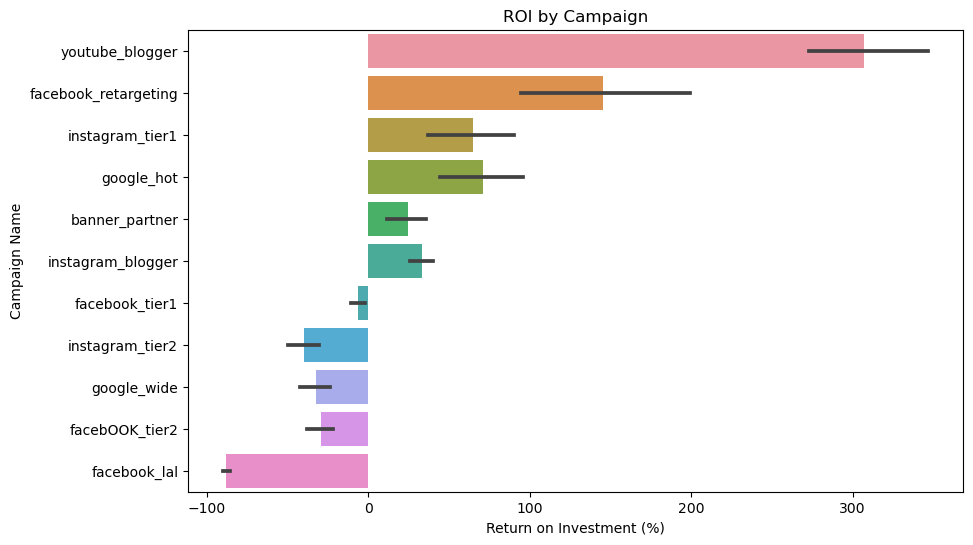

In [12]:
# Calculate ROI
df['ROI'] = ((df['revenue'] - df['spent']) / df['spent']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='ROI', y='campaign_name', data=df.sort_values('ROI', ascending=False))
plt.title('ROI by Campaign')
plt.xlabel('Return on Investment (%)')
plt.ylabel('Campaign Name')
plt.show()

#### **Interpretation:**

The visual chart reveals that the youtube_blogger campaign has the highest Return on Investment (ROI), making it the best performer, while the faceboko_lal campaign is identified as the worst performer among campaigns run in February

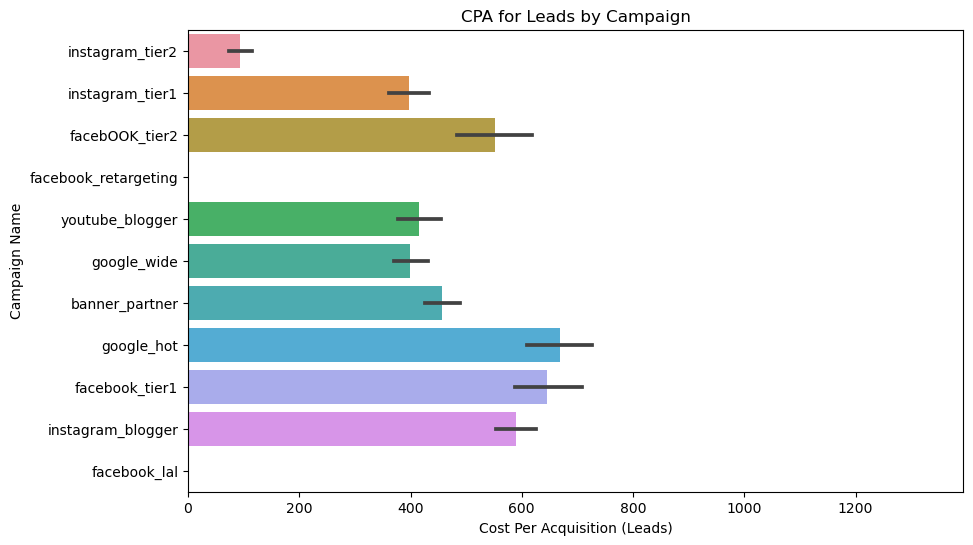

In [23]:
# Calculate CPA_leads
df['CPA_leads'] = df['spent'] / df['leads']

plt.figure(figsize=(10, 6))
sns.barplot(x='CPA_leads', y='campaign_name', data=df.sort_values('CPA_leads'))
plt.title('CPA for Leads by Campaign')
plt.xlabel('Cost Per Acquisition (Leads)')
plt.ylabel('Campaign Name')
plt.show()

#### **Interpretation:**

Cost Per Acquisition (CPA) analysis for leads in February shows instagram_tier2 as the best performer due to its lowest CPA, while facebook_lal is highlighted again as the worst performer across different metrics.

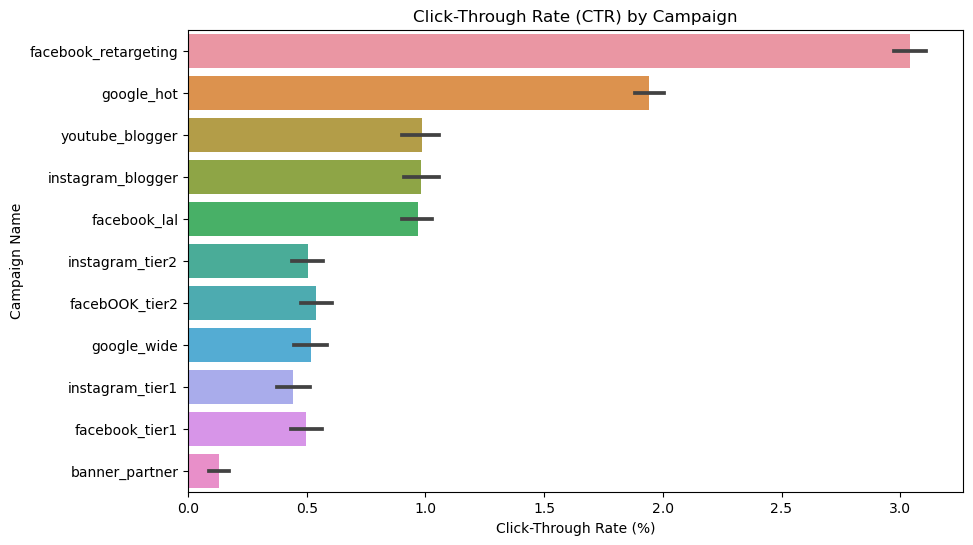

In [24]:
# Calculate CTR
df['CTR'] = (df['clicks'] / df['impressions']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='CTR', y='campaign_name', data=df.sort_values('CTR', ascending=False))
plt.title('Click-Through Rate (CTR) by Campaign')
plt.xlabel('Click-Through Rate (%)')
plt.ylabel('Campaign Name')
plt.show()

#### **Interpretation:**

The Click-Through Rate (CTR) metrics indicate that Facebook retargeting is the top performer, whereas the banner partner campaign has the lowest performance.

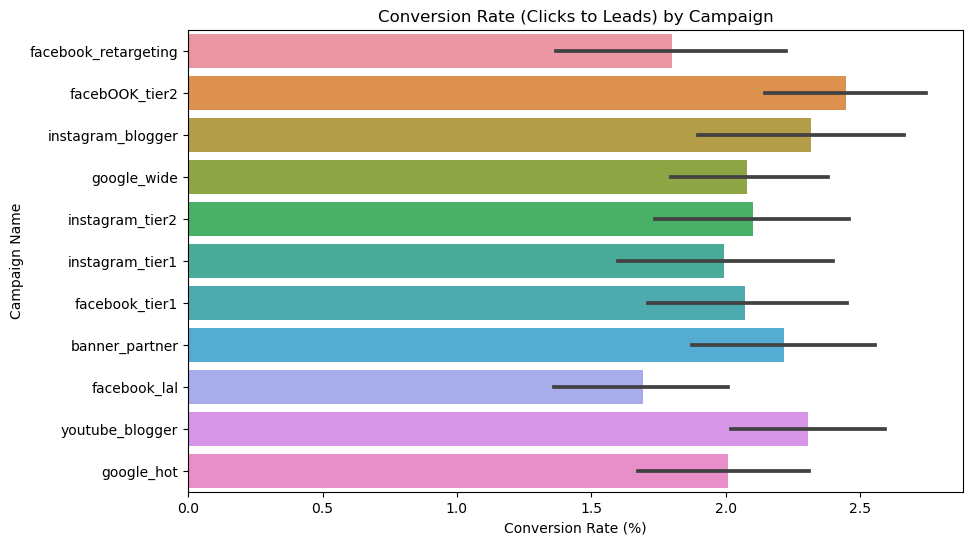

In [25]:
# Calculate Conversion Rate from Clicks to Leads
df['Conversion_Rate_Clicks_Leads'] = (df['leads'] / df['clicks']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='Conversion_Rate_Clicks_Leads', y='campaign_name', data=df.sort_values('Conversion_Rate_Clicks_Leads', ascending=False))
plt.title('Conversion Rate (Clicks to Leads) by Campaign')
plt.xlabel('Conversion Rate (%)')
plt.ylabel('Campaign Name')
plt.show()

#### **Interpretation:**

Interestingly, the Conversion Rate data show that Facebook Tier 2 and YouTube Blogger have the highest conversion rates, with Instagram Blogger and Banner Partner also performing well. This could be attributed to the latter's lower performance in CTR. Notably, Facebook LAL consistently shows poor performance.

#### Takeaways:

- High ROI on YouTube: The YouTube blogger campaign stands out with the highest Return on Investment (ROI), suggesting that content-driven influencer partnerships on YouTube are highly effective for generating value from marketing spend.

- Challenges with Facebook LAL: The Facebook Lookalike Audience (LAL) campaign is repeatedly identified as the underperformer in both ROI and other metrics, indicating that while targeting similar audiences can be powerful, this particular execution may need revisiting or optimization.

- Effective Facebook Retargeting: The success of the Facebook retargeting campaign in terms of Click-Through Rate (CTR) underscores the effectiveness of retargeting strategies on this platform, likely due to precise audience targeting based on prior engagement.

- Cost Efficiency with Instagram Tier 2: Instagram's Tier 2 campaign showcases the lowest Cost Per Acquisition (CPA) for leads, suggesting that targeting or creative strategies in this tier are cost-efficient and effective in generating interest and actions at a lower cost.

- Interesting Conversion Rate Dynamics: The high conversion rates for Facebook Tier 2 and YouTube Blogger campaigns, along with Instagram Blogger and the Banner Partner, reveal a nuanced view of campaign performance. The latter, despite a low CTR, still manages high conversion rates, suggesting that while fewer users may click, those who do are highly interested or intent on taking action. This points to the quality of engagement over sheer quantity.

- Persistent Poor Performance of Facebook LAL: Across various metrics, Facebook LAL consistently shows poor performance. This repeated finding indicates a critical area for reevaluation and adjustment in targeting, creative strategy, or overall campaign execution.

- Next Steps with Time Series Analysis: Moving forward with a Time Series analysis will provide deeper insights into how these trends and performances evolve over time, especially within the specific context of February's daily and weekly shifts. This could uncover more granular insights into campaign effectiveness, audience behaviors, and potential external influences on marketing outcomes.

## Time Series

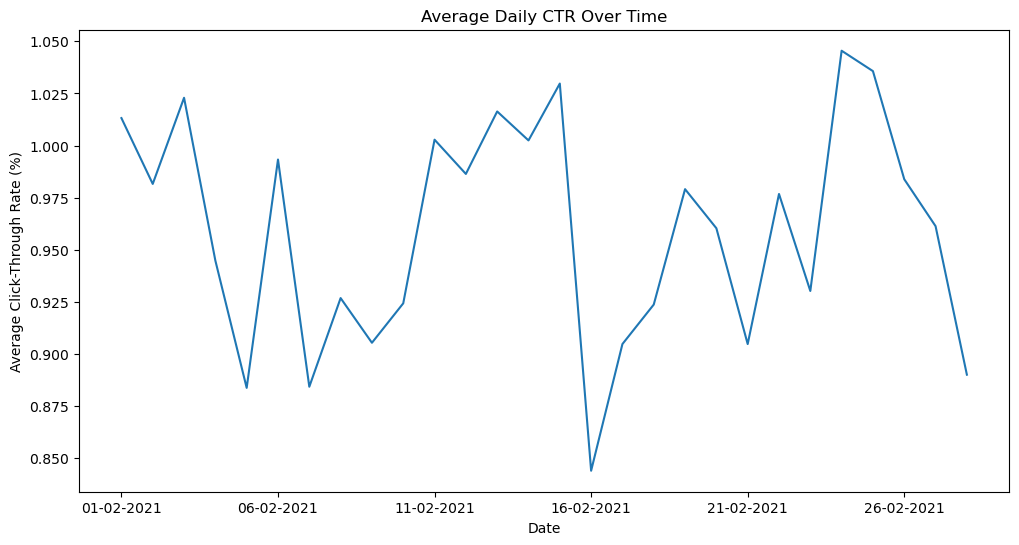

In [28]:
df['CTR'] = (df['clicks'] / df['impressions']) * 100
daily_ctr = df.groupby('c_date')['CTR'].mean()

plt.figure(figsize=(12, 6))
daily_ctr.plot()
plt.title('Average Daily CTR Over Time')
plt.xlabel('Date')
plt.ylabel('Average Click-Through Rate (%)')
plt.show()

#### **Interpretation:**

Click-through rates were highest on the 24th and 25th, and lowest on 16th.

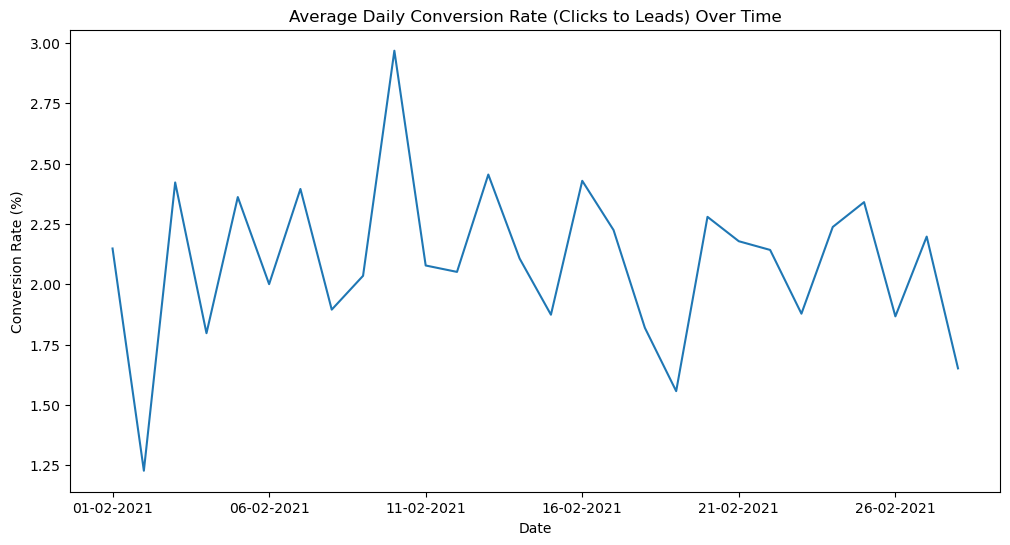

In [36]:
df['Conversion_Rate_Clicks_Leads'] = (df['leads'] / df['clicks']) * 100
daily_conversion_rate = df.groupby('c_date')['Conversion_Rate_Clicks_Leads'].mean()

plt.figure(figsize=(12, 6))
daily_conversion_rate.plot()
plt.title('Average Daily Conversion Rate (Clicks to Leads) Over Time')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.show()

#### **Interpretation:**

Conversion rates were all over the place - highest on the 10th, lowest on the 2nd and 19th. So the ability to turn clicks into actions was pretty variable.

### Efficiency and Cost Anlaysis

In [38]:
# Cost Per Click (CPC)
df['CPC'] = df['spent'] / df['clicks']
# Cost Per Thousand Impressions (CPM)
df['CPM'] = (df['spent'] / df['impressions']) * 1000
# Average Order Value (AOV)
df['AOV'] = df['revenue'] / df['orders']
# Revenue Per Click (RPC)
df['RPC'] = df['revenue'] / df['clicks']

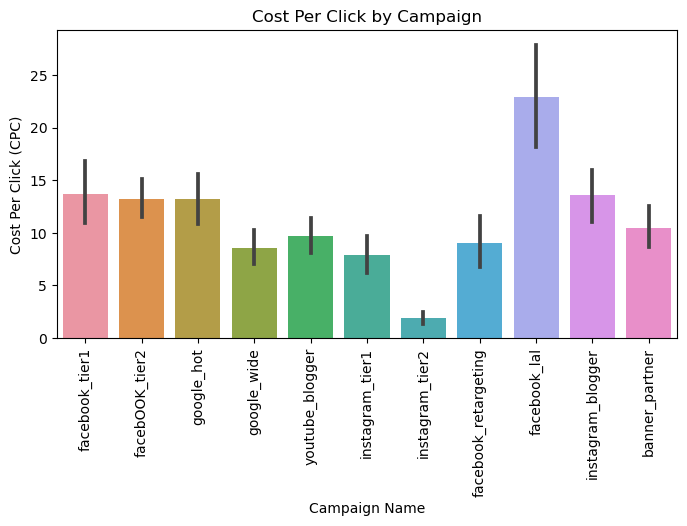

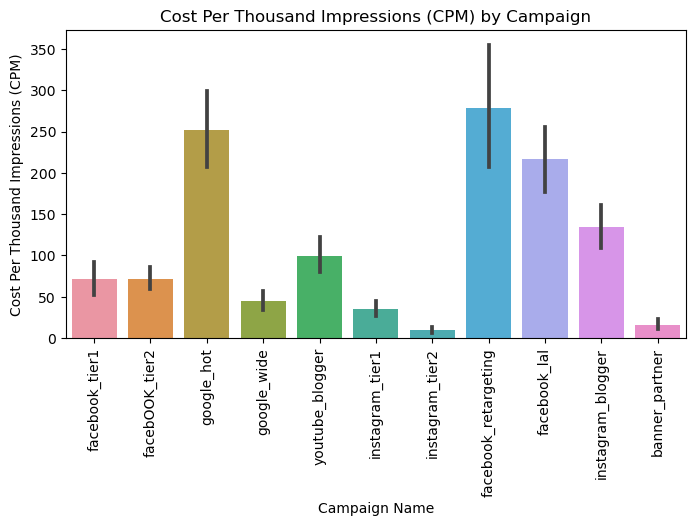

In [39]:
plt.figure(figsize=(8, 4))
sns.barplot(x='campaign_name', y='CPC', data=df)
plt.xticks(rotation=90)
plt.title('Cost Per Click by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Cost Per Click (CPC)')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='campaign_name', y='CPM', data=df)
plt.xticks(rotation=90)
plt.title('Cost Per Thousand Impressions (CPM) by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Cost Per Thousand Impressions (CPM)')
plt.show()

#### **Interpretation:**

In terms of advertising costs, instagram_tier2 ads emerged as the most cost-effective option, showing the lowest cost per click (CPC) and cost per thousand impressions (CPM), contrasting sharply with facebook_lal audiences and targeted ads, and google_hot leads, which were among the most expensive.

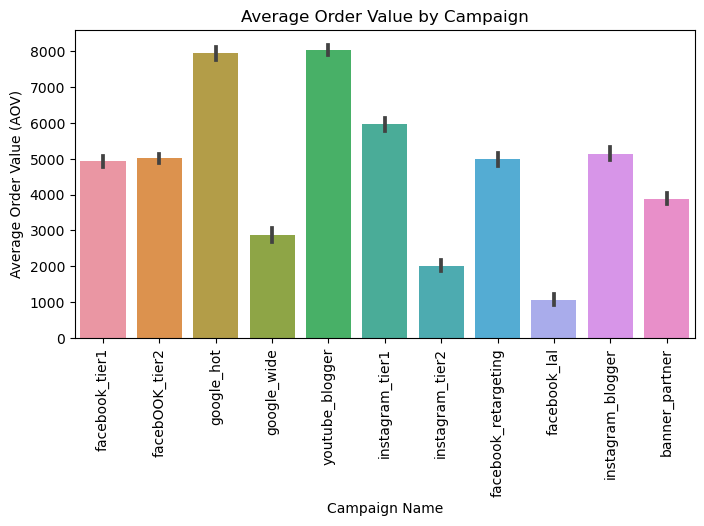

In [40]:
plt.figure(figsize=(8, 4))
sns.barplot(x='campaign_name', y='AOV', data=df)
plt.xticks(rotation=90)
plt.title('Average Order Value by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Average Order Value (AOV)')
plt.show()

#### **Interpretation:**

Looking at average order value, gogole_hot leads and youtube_blogger collaborations brought in the highest revenue per purchase, facebook_lal audiences and instagram_tier2 ads performed behind.

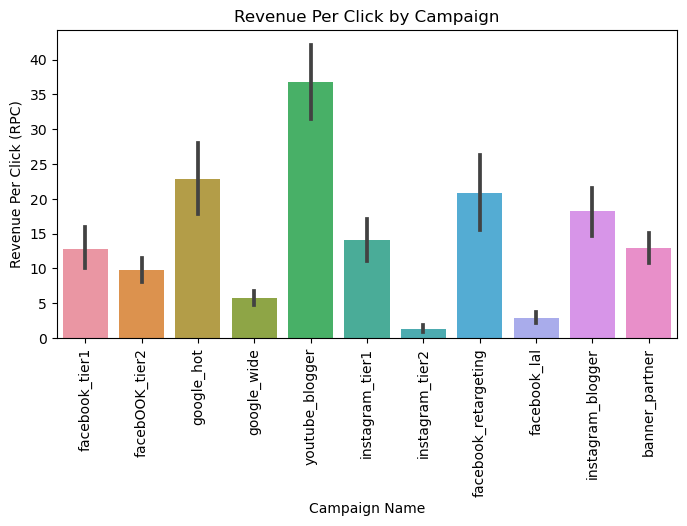

In [41]:
plt.figure(figsize=(8, 4))
sns.barplot(x='campaign_name', y='RPC', data=df)
plt.xticks(rotation=90)
plt.title('Revenue Per Click by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Revenue Per Click (RPC)')
plt.show()

#### **Interpretation:**

For revenue per click, youtube_blogger collaborations was the best performing leads, with google_hot leads and facebook_retargeting ads also doing well. Strangely, despite their cost-effectiveness, instagram_tier2 ads and facebook_lal audiences had the lowest revenue per click.

Final Takeaway: In summary, there was a pretty complex interplay between all the different metrics. You can't just look at one data point to understand what really drove performance. The full picture requires digging into bigger and deeper Datasets.